In [1]:
from sklearn import metrics
import pandas as pd

id = '11_3'

# simulator = pd.read_csv('simulator/ADT_simulator_'+id+'.csv', sep=',', index_col=0, header=0)

simulator = pd.read_csv('datasets/SeuratV4/adt_p8_main_clr.csv',index_col=0)
# true = pd.read_csv('simulator/droplets_composition_'+id+'.csv', sep=',')
label = pd.read_csv('datasets/SeuratV4/metadata_seuratV4.txt',sep='\t')
label = label[label.index.isin(simulator.index)]
true = label[ 'celltype.l2']
# true = pd.read_csv('simulator/droplets_composition_10_3.csv', sep=',')
# true = pd.concat([pd.Series('B Naive',index=list(range(0,4437))),pd.Series('CD4 Naive',index=list(range(4437,14485)))])
# true = pd.concat([true,pd.concat([pd.Series('CD8 Naive',index=list(range(14485,20675))),pd.Series('NK',index=list(range(20675,30547)))])])

# pred = pd.read_csv('CITE-sort-master/CITEsort_out/simulator_10_1/leaf_labels.csv')
# pred = pd.read_csv('CITE-sort-master/CITEsort_out/simulator_'+id+'_smooth/leaf_labels.csv')
pred = pd.read_csv('output/rna/mian_p8/leaf_labels.csv' )
# pred = pred.loc[pred.index.isin(simulator.index),:]
# pred = pd.read_csv('CITE-sort-master/CITEsort_out/SeuratV3_main_ct_smooth2/leaf_labels.csv',index_col=0)
# pred = pd.read_csv('CITE-sort-master/CITEsort_out/simulator_9_10/BIC_stop_labels.csv')
# true = true[true['cell_type']!='[7]']
# true.index = pred.index
# true.rename(columns={'CD3+CD19':'cell_type'},inplace=True)

# pred.set_index('GEM',inplace=True)
# true.index = true.iloc[:,0]
# pred.index = pred['ind']
ARI = metrics.adjusted_rand_score(list(true), list(pred['Label']))
AMI = metrics.adjusted_mutual_info_score(list(true), list(pred['Label']))

In [18]:
label['donor'].value_counts()

P8    8362
Name: donor, dtype: int64

In [89]:
# true_db = ['doublet' if len(true['cell_type'][i])>4 and len(true['cell_type'][i])<=7 else true['cell_type'][i] for i in range(true.shape[0]) ]
# true_db = ['multi(>2)' if len(true_db[i])>7 and true_db[i] != 'doublet' else true_db[i] for i in range(true.shape[0]) ]
true_db = ['multi(>2)' if len(true['cell_type'][i])>7 and true['cell_type'][i] != 'doublet' else true['cell_type'][i] for i in range(true.shape[0]) ]
true_db = pd.DataFrame(data=true_db, index=true.index, columns=['cell_type'])

In [90]:
cell_type = true_db['cell_type'].unique()
true_homo = true_db.copy()
for ct in cell_type:
    if len(ct)==6 and ct[1] == ct[4]:
        print(ct)
        true_homo.loc[true_db['cell_type']==ct] = '['+ct[1]+']'
cell_type_homo = true_homo['cell_type'].unique()
ARI = metrics.adjusted_rand_score(list(true_homo['cell_type']), list(pred['Label']))
AMI = metrics.adjusted_mutual_info_score(list(true_homo['cell_type']), list(pred['Label']))

[0, 0]
[1, 1]
[2, 2]
[3, 3]


<AxesSubplot:>

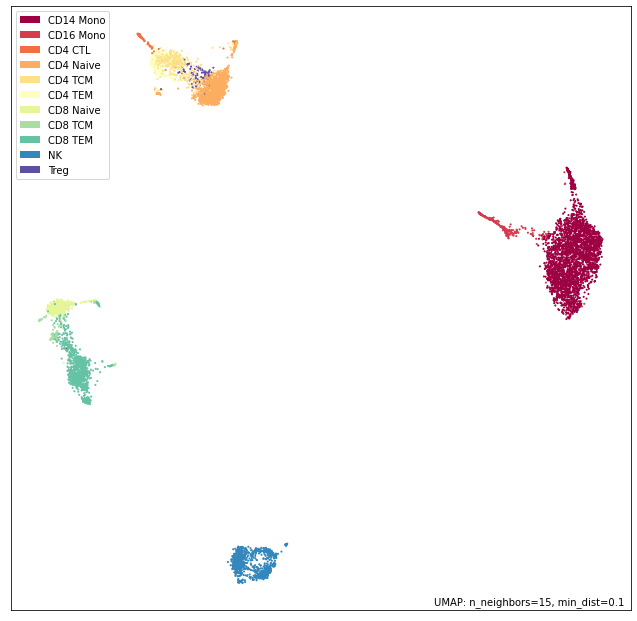

In [4]:
import umap
import umap.plot
import matplotlib.pyplot as plt
import pandas as pd

# columns = ['CD4-1', 'CD3-1', 'CD45RA', 'CD56-1', 'CD16', 'CD14', 'CD19', 'CD2', 'CD8', 'CD21']
# columns = ['CD62P', 'CD4-2', 'CD4-1', 'CD3-1', 'CD27', 'CD25', 'CD45RA', 'CD56-2', 'CD56-1', 'CD45RO', 'CD127', 'CD16', 'CD14', 'CD19', 'CD2', 'CD8', 'CD192', 'CD69', 'CD21', 'CD3-2']

# simulator = pd.read_csv('./data/seurat_v3/adt_main_clr_1.csv',header=0,index_col=0)
# true = pd.read_csv('simulator/droplets_composition_10_1.csv', sep=',')
# pred = pd.read_csv('CITE-sort-master/CITEsort_out/simulator_10_1/leaf_labels.csv')
# simulator = pd.read_csv('simulation_out/simulator_9_1/subdata.csv', sep=',', index_col=0, header=0)
# cat = set(list(true['cell_type']))
mapper = umap.UMAP().fit(simulator)
# pred_2 = pd.read_csv('CITE-sort-master/CITEsort_out/simulator_2_0_1/leaf_labels.csv')
# umap.plot.points(mapper, labels=true['cell_type'])
umap.plot.points(mapper, labels=label[ 'celltype.l2'])

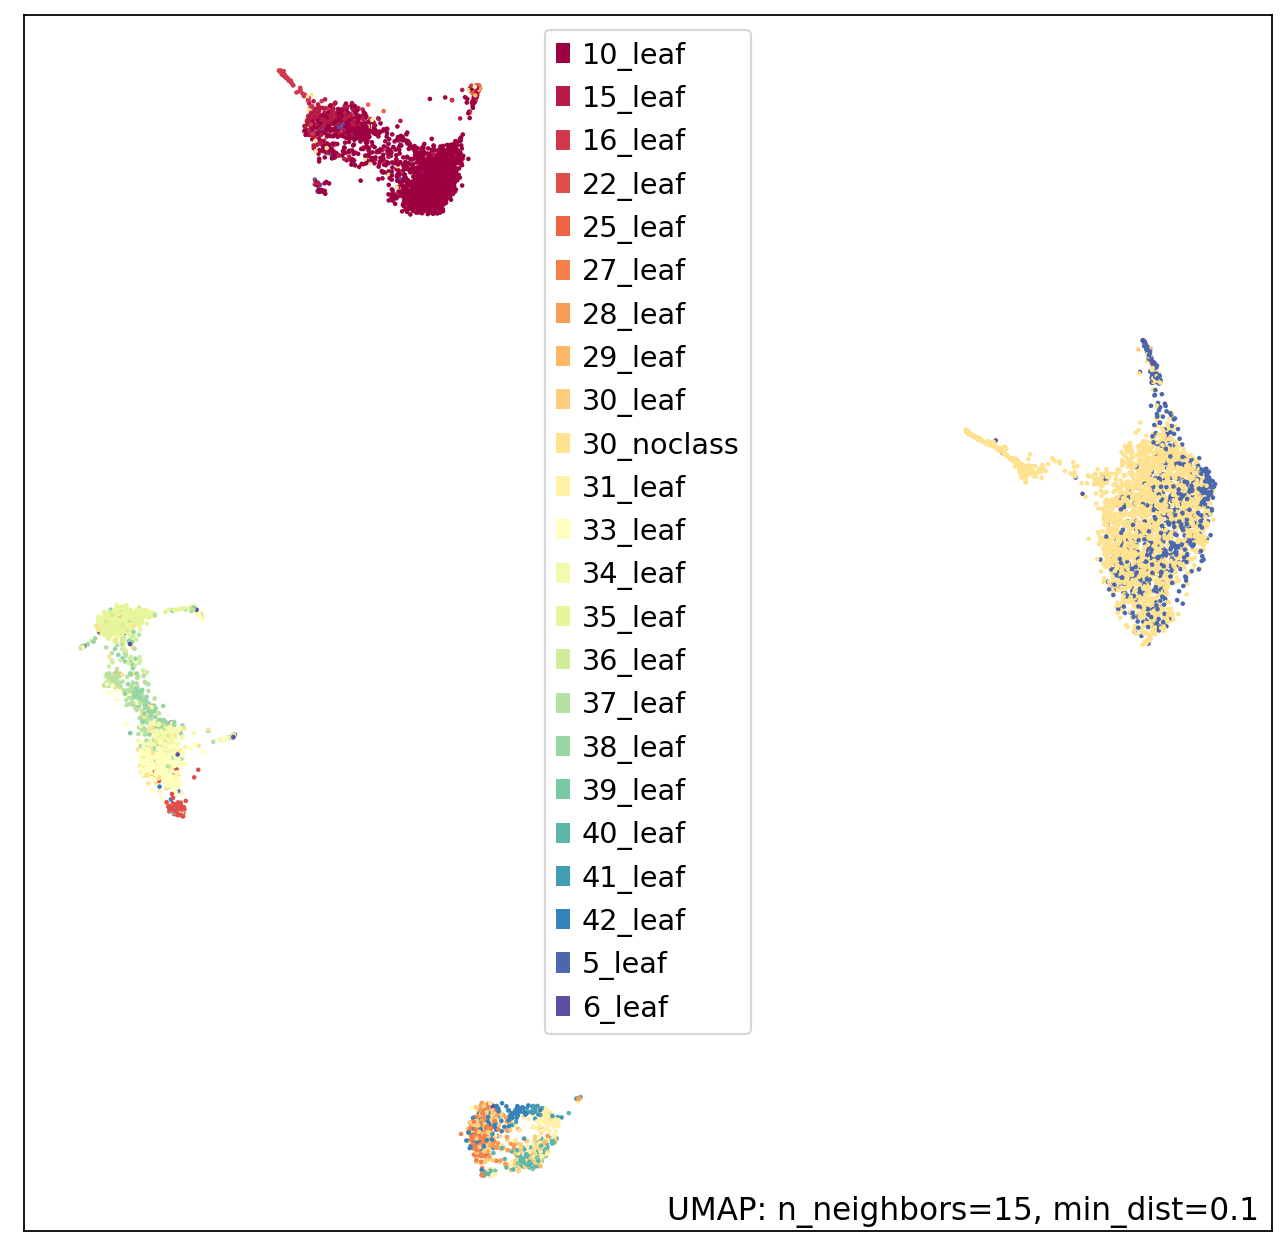

In [42]:
pred = pd.read_csv('output/rna/main_p8_/leaf_labels.csv',index_col=0)
umap.plot.points(mapper, labels=pred['Label'].mask(pred['Label'].isnull(),'30_noclass').astype(str))
pred_adt = pd.read_csv('output/adt/main_p8_/leaf_labels.csv',index_col=0)
# pred_adt['Label'].mask(pred_adt['Label'].isnull(),0)
# umap.plot.points(mapper, labels=pred_adt['Label'].mask(pred_adt['Label'].isnull(),'30').astype(str))

In [35]:
import scanpy as sc 

adata = sc.read_h5ad('./datasets/SeuratV4/rna_with_label.h5ad')

In [17]:
print(pred_sub['Label'].value_counts()[:20])

38_leaf    705
16_leaf    682
8_leaf     505
37_leaf    114
46_leaf     31
40_leaf      3
11_leaf      2
44_leaf      2
45_leaf      2
19_leaf      1
Name: Label, dtype: int64


<AxesSubplot:>

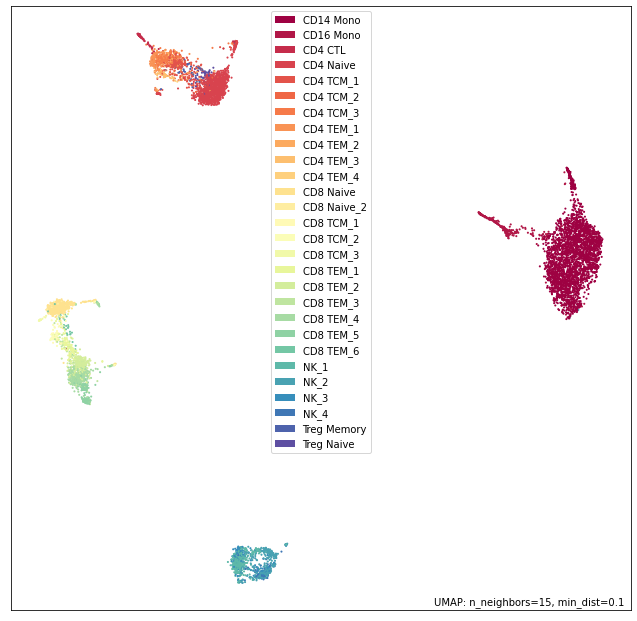

In [26]:
umap.plot.points(mapper, labels=label[ 'celltype.l3'])

<AxesSubplot:>

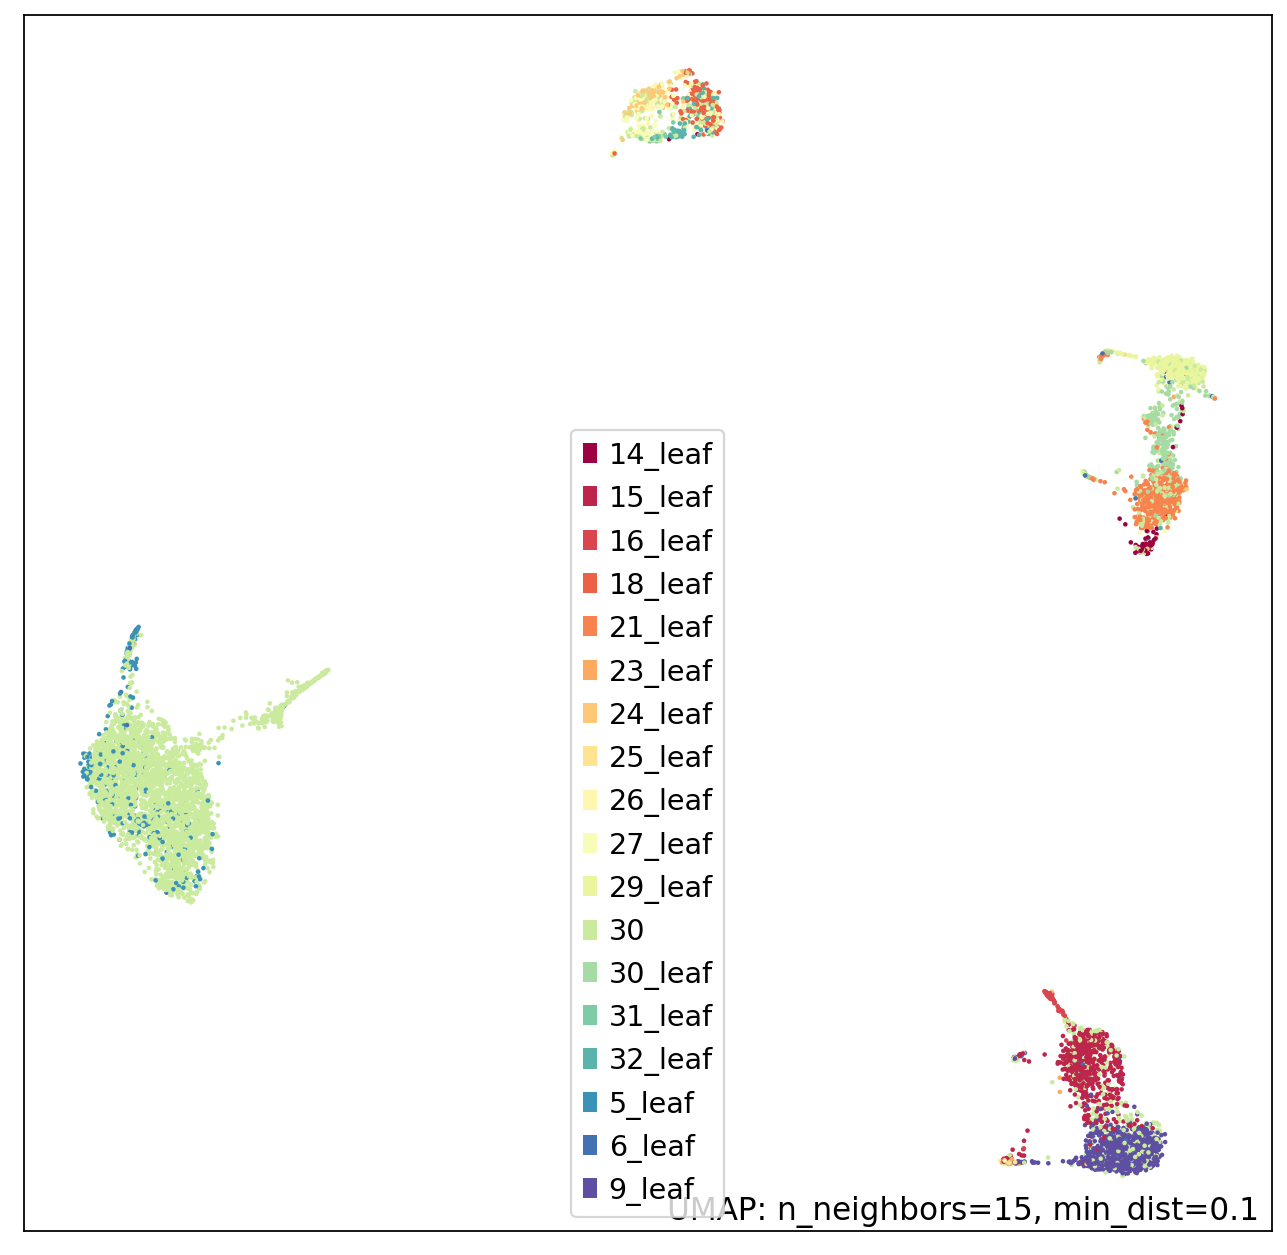

In [70]:

pred_adt = pd.read_csv('output/rna/main_p8/leaf_labels.csv' )
# pred_adt['Label'].mask(pred_adt['Label'].isnull(),0)
umap.plot.points(mapper, labels=pred_adt['Label'].mask(pred_adt['Label'].isnull(),'30').astype(str))

In [15]:
pred_adt.index = pred_adt.iloc[:,0]

In [16]:
pred_sub = pred_adt[label['celltype.l1']=='CD4 T']
# pred_sub_ = pred[true_homo.iloc[:,0]=='[3]']
# print(true['cell_type'].value_counts()[:20])
print(pred_sub['Label'].value_counts()[:20])
# print(pred_sub_['Label'].value_counts()[:20])

38_leaf    705
16_leaf    682
8_leaf     505
37_leaf    114
46_leaf     31
40_leaf      3
11_leaf      2
44_leaf      2
45_leaf      2
19_leaf      1
Name: Label, dtype: int64


In [75]:
pred_adt.index = pred.iloc[:,0]

In [55]:
true_sub = label[label.index.isin(pred.index)]['celltype.l1'][pred['Label']=='22_leaf']
print(true_sub.value_counts()[:20])

CD8 Naive      485
CD8 TEM_1      116
CD8 TEM_2       69
CD8 TCM_2       64
CD8 TCM_1       36
CD8 TEM_3       23
CD8 TEM_6       22
CD8 Naive_2     16
CD8 TCM_3       13
CD8 TEM_4       12
CD14 Mono        1
CD8 TEM_5        1
NK_3             1
Name: celltype.l3, dtype: int64


In [38]:
import scanpy as sc
adata = sc.read_h5ad('datasets/SeuratV4/rna_with_label.h5ad')
adata_sub = adata[true.index,:]

In [39]:
from CITEsort_rna.metadimm import MetaDIMM
from CITEsort_rna.utils import Utils

md = MetaDIMM()
adata_sub = md.filter(adata_sub)
adata_sub = md.preprocess(adata_sub, normalize=True, log1p=True, hvg=True, scale=True)
sc.pp.scale(adata_sub, max_value=10)
sc.tl.pca(adata_sub, n_comps=10)

/home/xinzhu/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


-----------------------------------
Function 'filter' executed in 1.37s
-----------------------------------
---------------------------------------
Function 'preprocess' executed in 2.43s
---------------------------------------


In [40]:
sc.pp.neighbors(adata_sub)
sc.tl.umap(adata_sub)

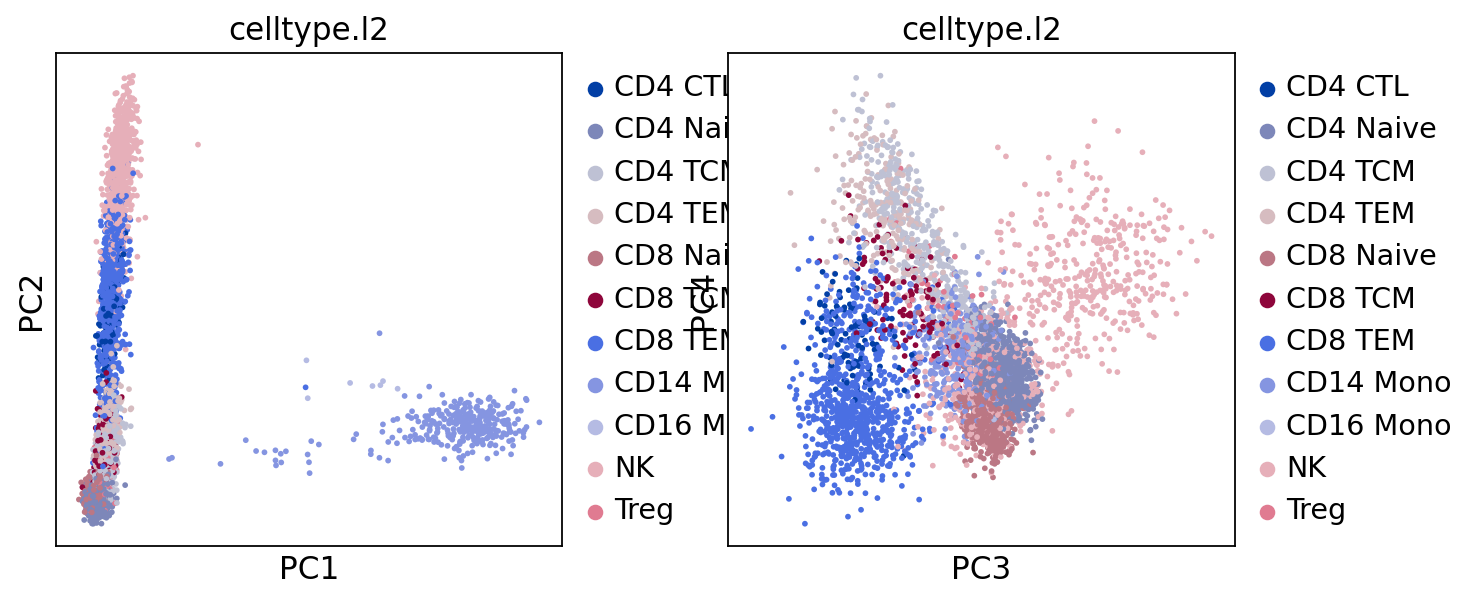

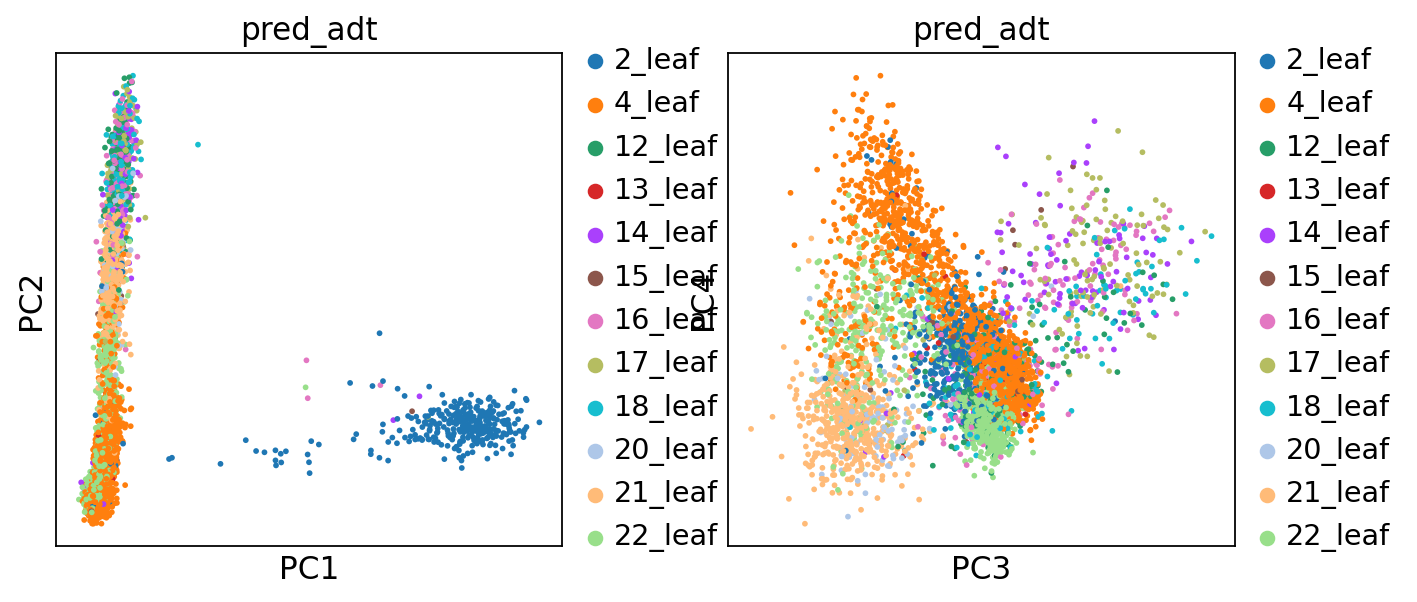

In [87]:
sc.pl.pca(adata_sub,components=['1,2','3,4'],color='celltype.l2')
sc.pl.pca(adata_sub,components=['1,2','3,4'],color='pred_adt')

In [ ]:
pred_adt.index = pred_adt.loc[]

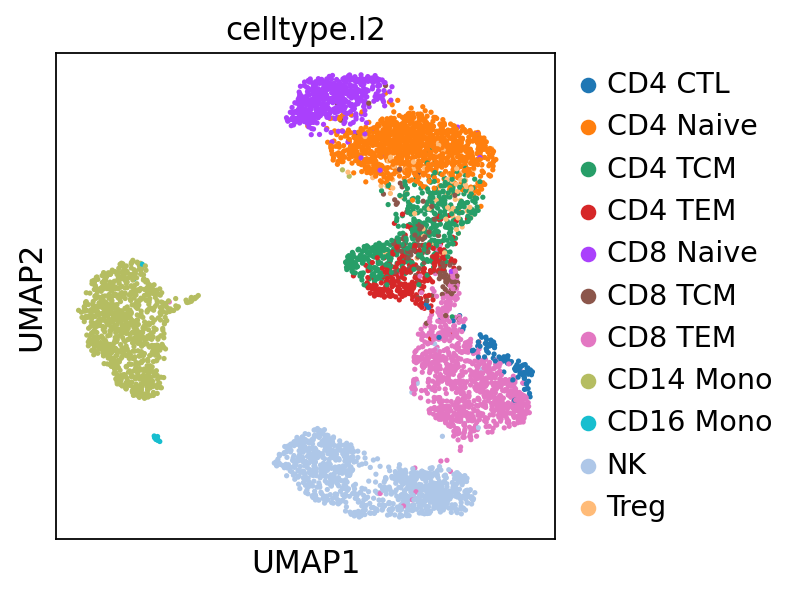

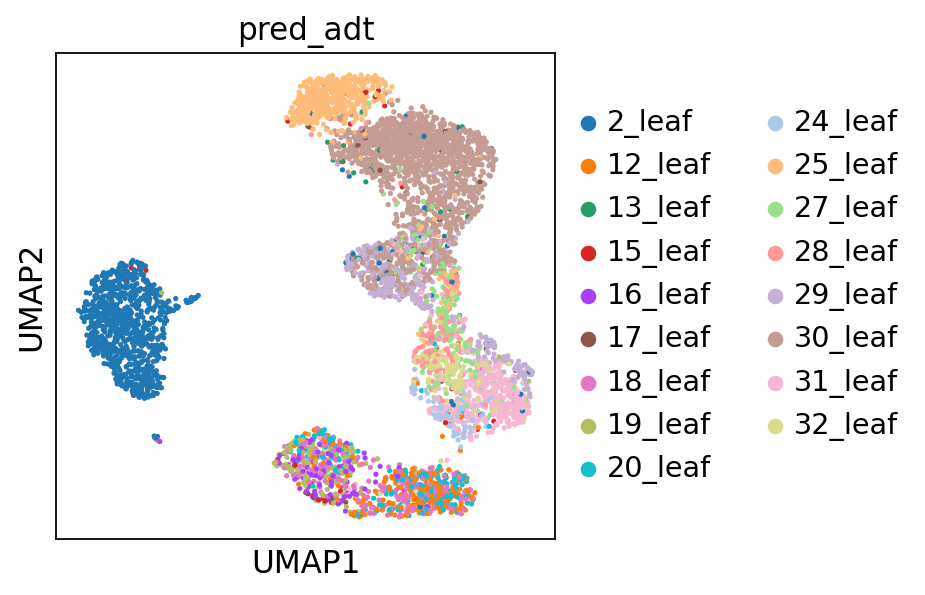

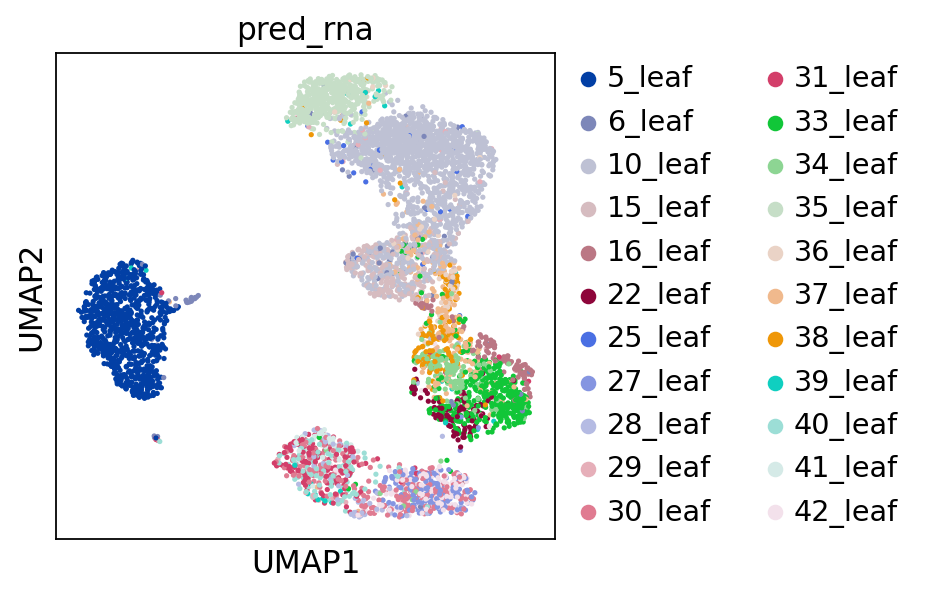

In [43]:
adata_sub.obs['pred_rna'] = pred['Label']
adata_sub.obs['pred_adt'] = pred_adt['Label'].mask(pred_adt['Label'].isnull(),'null')
adata_sub.obs['celltype.l2'] = true
adata_sub.obs['celltype.l3'] = label[label.index.isin(pred.index)]['celltype.l3']
sc.pl.umap(adata_sub,color='celltype.l2')
sc.pl.umap(adata_sub,color='pred_adt')
sc.pl.umap(adata_sub,color='pred_rna')

In [ ]:

def display_subdata(data,node_data,**para):
    
    savepath = para.get('savepath',None)
    dpi = para.get('dpi',64)
    hist_bw = para.get('hist_bw',0.2)
    fig_name = para.get('fig_name',None)

    if savepath is not None and fig_name is None:
        print('Warning: Para fig_name is required to save figures.')
        return
    
    #print('plot histgrams of all markers in CLR format.')
    plt.figure(figsize=(12,2*np.ceil(node_data.shape[1] / 5)), dpi=dpi)
    plt.style.use('seaborn-white')
    for i in range(node_data.shape[1]):
        ax = plt.subplot(int(np.ceil(node_data.shape[1] / 5)),5,i+1)
        sns.distplot(data.iloc[:,i].values,kde_kws={'bw':0.2},color='gray')
        sns.distplot(node_data.iloc[:,i].values,kde_kws={'bw':hist_bw},color='red')
        plt.yticks([0,1])
        plt.title(node_data.columns[i],fontsize=15)
        if i%5 == 0:
            plt.ylabel('Density',fontsize=12)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
    
    if fig_name is None:
        plt.suptitle(str(node_data.shape[0])+' droplets',fontsize=18)  
    else:
        plt.suptitle(fig_name+', '+str(node_data.shape[0])+' droplets',fontsize=18)    
        
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.6,wspace=0.15)
    plt.subplots_adjust(top=0.8)
    if savepath is not None:
        plt.savefig(savepath+'/'+fig_name.replace(' ','_')+'.png')

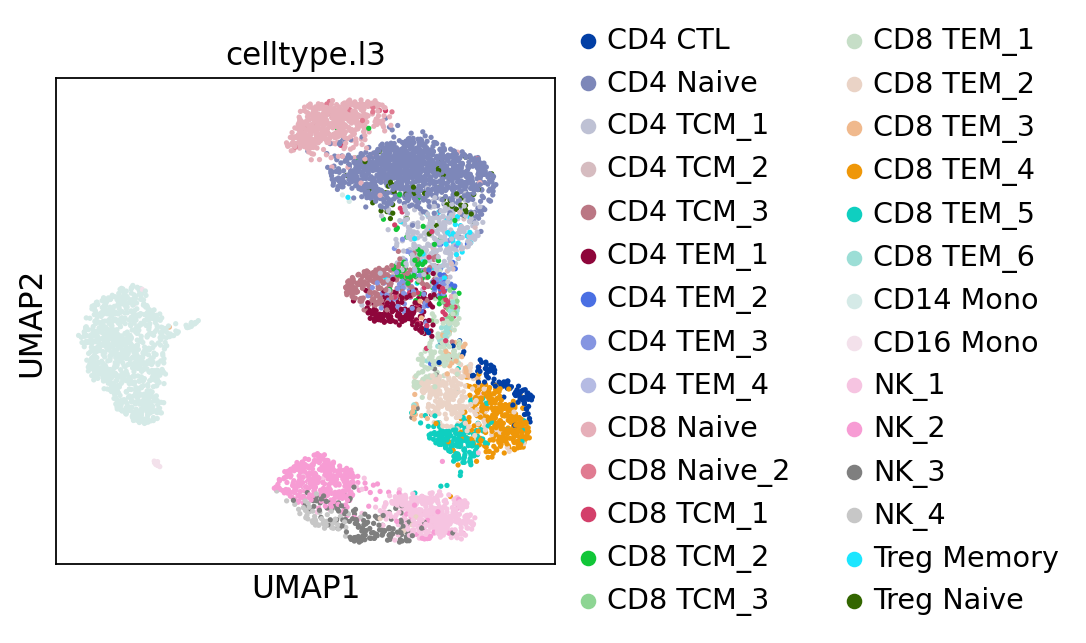

In [44]:
sc.pl.umap(adata_sub,color='celltype.l3')

In [23]:
true.value_counts()

CD14 Mono            1780
CD4 Naive             834
CD4 TCM               810
CD8 TEM               600
NK                    448
CD8 Naive             409
CD4 CTL               198
Treg                  185
CD4 TEM               168
B naive               152
CD8 TCM               142
CD16 Mono             134
B memory               38
NK_CD56bright          34
B intermediate         32
Plasmablast            18
NK Proliferating       13
CD8 Proliferating       4
CD4 Proliferating       3
Name: celltype.l2, dtype: int64

In [94]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


def display_subdata(data,node_data,**para):
    
    savepath = para.get('savepath',None)
    dpi = para.get('dpi',64)
    hist_bw = para.get('hist_bw',0.2)
    fig_name = para.get('fig_name',None)

    if savepath is not None and fig_name is None:
        print('Warning: Para fig_name is required to save figures.')
        return
    
    #print('plot histgrams of all markers in CLR format.')
    plt.figure(figsize=(12,2*np.ceil(node_data.shape[1] / 5)), dpi=dpi)
    plt.style.use('seaborn-white')
    for i in range(node_data.shape[1]):
        ax = plt.subplot(int(np.ceil(node_data.shape[1] / 5)),5,i+1)
        sns.distplot(data.iloc[:,i].values,kde_kws={'bw':0.2},color='gray')
        sns.distplot(node_data.iloc[:,i].values,kde_kws={'bw':hist_bw},color='red')
        plt.yticks([0,1])
        plt.title(node_data.columns[i],fontsize=15)
        if i%5 == 0:
            plt.ylabel('Density',fontsize=12)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
    
    if fig_name is None:
        plt.suptitle(str(node_data.shape[0])+' droplets',fontsize=18)  
    else:
        plt.suptitle(fig_name+', '+str(node_data.shape[0])+' droplets',fontsize=18)    
        
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.6,wspace=0.15)
    plt.subplots_adjust(top=0.8)
    if savepath is not None:
        plt.savefig(savepath+'/'+fig_name.replace(' ','_')+'.png')
    plt.show()
    #plt.show()
    

In [95]:
subdata = simulator[true.loc[:,'cell_type']=='CD4 Memory']
# data = pd.concat([subdata,simulator[true.loc[:,'cell_type']=='B Naive']])
# display_subdata(simulator, subdata)